In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx", sheet_name = None)
data.keys()

odict_keys(['vc', '0V 0,1M LiClO4', '-0,3V 0,1M LiClO4', '0V 0,5M LiClO4', '-0,3V 0,5M LiClO4', '0V 1M LiClO4', '-0,3V 1M LiClO4', '0V 0,1M Na2SO4', '-0,3V 0,1M Na2SO4', '0V 0,1M AcCN', '-0,3V 0,1 M AcCN', 'RC', 'Oxygen'])

# Voltametria ciclica

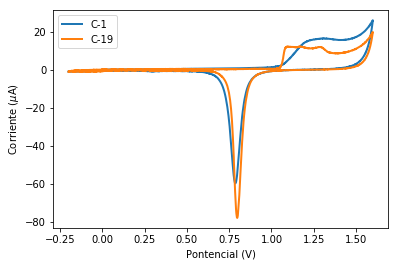

In [3]:
x1, y1 = data['vc'][['X1', 'Y1']].values[10:].T
x2, y2 = data['vc'][['X2', 'Y2']].values[10:].T

plt.plot(x1, y1*1e6, label = "C-1", lw = 2)
plt.plot(x2, y2*1e6, label = "C-19", lw = 2)

plt.xlabel("Pontencial (V)")
plt.ylabel("Corriente ($\mu$A)")
plt.legend()

plt.savefig("voltametrias.png", dpi = 300)
plt.show()

# Impedancias

In [4]:
freq = np.logspace(5, -1, 61) #0.1 - 100 kHz

In [5]:
voltage_1 = ['0V 0,1M LiClO4', '0V 0,5M LiClO4', '0V 1M LiClO4'] 
voltage_2 = ['-0,3V 0,1M LiClO4', '-0,3V 0,5M LiClO4', '-0,3V 1M LiClO4']

In [6]:
def reImToMP(data):
    x, y = data.values.T
    p = np.rad2deg(np.arctan2(y, x))
    m = abs(x + 1j*y)
    return m, p

## Efecto de la concentracion en LiClO4

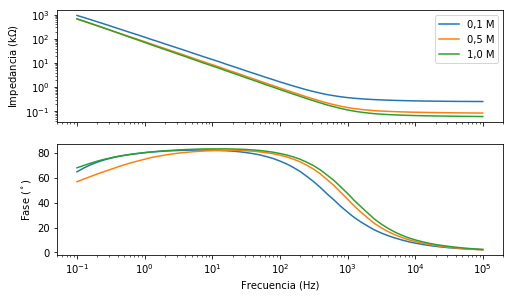

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

mps = [reImToMP(data[sheet] / 1e3) for sheet in voltage_1]
labels = ["0,1 M", "0,5 M", "1,0 M"]

for i in range(len(labels)):
    m, p = mps[i]
    ax1.plot(freq, m, label = labels[i])
    ax2.plot(freq, p)

ax1.set_xscale('log')
ax1.set_yscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')

ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_0,0V.png", dpi = 300)
plt.show()

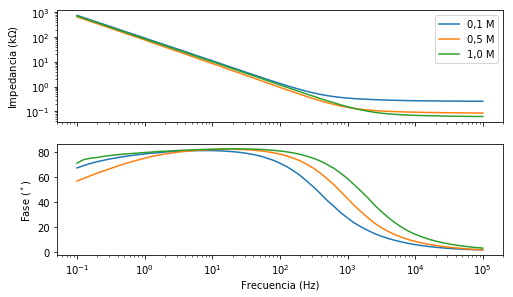

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

mps = [reImToMP(data[sheet] / 1e3) for sheet in voltage_2]
labels = ["0,1 M", "0,5 M", "1,0 M"]

for i in range(len(labels)):
    m, p = mps[i]
    ax1.plot(freq, m, label = labels[i])
    ax2.plot(freq, p)

ax1.set_xscale('log')
ax1.set_yscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')

ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_0,3V.png", dpi = 300)
plt.show()

## Efecto del potencial

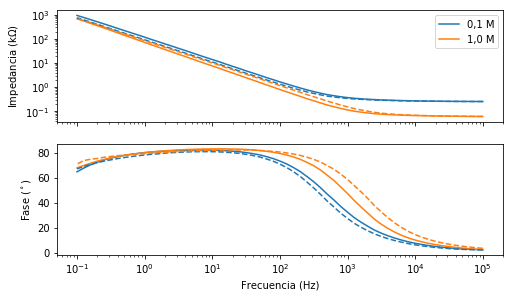

In [9]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 4.5), sharex = True)

voltages = [voltage_1[0], voltage_1[2], voltage_2[0], voltage_2[2]]
labels = ["0,1 M", '1,0 M']

mps = [reImToMP(data[sheet] / 1e3) for sheet in voltages]
cs = []

for i in range(2):
    m, p = mps[i]
    c = ax1.plot(freq, m, label = labels[i])[0].get_color()
    ax2.plot(freq, p)
    cs.append(c)
    
for i in range(2, 4):
    m, p = mps[i]
    c = cs[i - 2]
    ax1.plot(freq, m, "--", color = c)
    ax2.plot(freq, p, "--", color = c)

ax1.set_xscale('log')
ax1.set_yscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')

ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("LiClO4_voltages.png", dpi = 300)
plt.show()

In [10]:
iones = ['0V 0,1M LiClO4', '0V 0,1M Na2SO4', '0V 0,1M AcCN', 'RC']

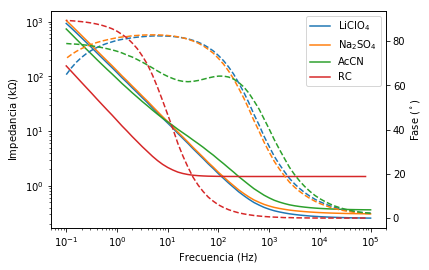

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

labels = ["LiClO$_4$", 'Na$_2$SO$_4$', 'AcCN', 'RC']

mps = [reImToMP(data[sheet] / 1e3) for sheet in iones]

for i in range(len(labels)):
    m, p = mps[i]
    c = ax1.plot(freq, m, label = labels[i])[0].get_color()
    ax2.plot(freq, p, "--", color = c)

ax1.set_xscale('log')
ax1.set_yscale('log')
    
ax1.set_ylabel('Impedancia (k$\Omega$)')

ax1.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase ($^\circ$)')

ax1.legend()

plt.savefig("Iones.png", dpi = 300)
plt.show()